<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/ModuleH_22_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H: 22.1 - 22.3


## ODE Initial Value Problem Statement



In this section, I will write code that demonstratest the concept of ODE Initial Value Problem Statement

First, an overview of the topic:

An ODE Initial Value Problem (IVP) involves finding a function
$y(t)$
that satisfies a first-order ordinary differential equation:

$
\frac{dy}{dt} = f(t,y)
$​

along with an initial condition:

$y(t_0) = y_0$

The goal is to determine the solution
$y(t)$ that starts at the point
$(t_0,y_0)$
and follows the behavior defined by the differential equation.

This program solves $\frac{dy}{dt} = -2y$ with $y(0) = 1$

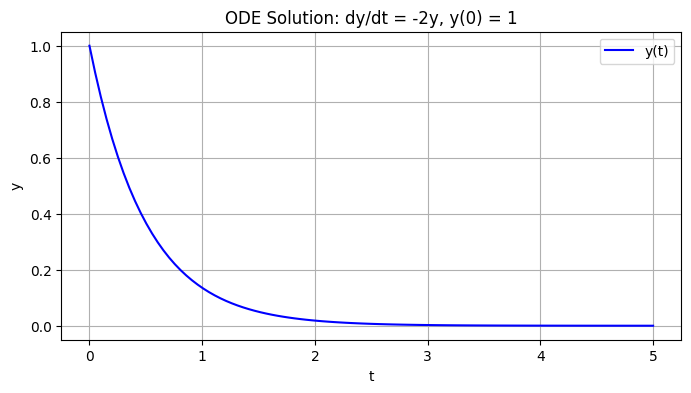

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE function dy/dt = f(t, y)
def ode_function(t, y):
    return -2 * y

# Initial condition
t0 = 0     # Initial time
y0 = [1]   # Initial value of y

# Time range to solve over
t_span = (t0, 5)                  # From t = 0 to t = 5
t_eval = np.linspace(*t_span, 100)  # Times at which to evaluate the solution

# Solve the ODE
solution = solve_ivp(ode_function, t_span, y0, t_eval=t_eval)

# Plot the solution
plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[0], label='y(t)', color='blue')
plt.title("ODE Solution: dy/dt = -2y, y(0) = 1")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

## Reduction of Order

In this section, I will write a program that demonstrates the concept of Reduction of Order

Reduction of order is a method used to find a second, linearly independent solution to a second-order linear ODE when one solution is already known.

Given:

$
y^n + p(t)y' + q(t)y = 0
$

and a known solution $y_1(t)$, assume a second solution of the form:

$
y_2(t) = v(t) \cdot y_1(t)
$

Substitute into the equation, simplify, and solve for $v(t)$ to find $y_2(t)$.

This method "reduces" the second-order ODE to a first-order equation for
$v(t)$ to find
$y_2(t)$.

This program shows this concept by working on a known solution $y_1(t) = e^t$ and finds a second solution $y_2(t)$

Second linearly independent solution y2(t):


     -t 
-C₁⋅ℯ   
────────
   2    

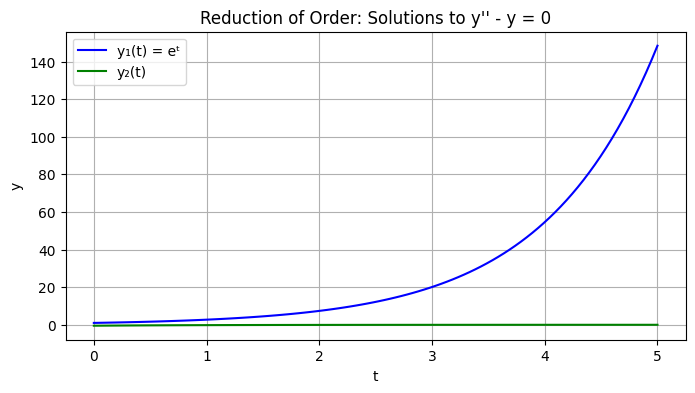

In [5]:
import sympy as sp

# Define symbols
t = sp.symbols('t')
v = sp.Function('v')
y1 = sp.exp(t)  # Known solution to y'' - y = 0

# Assume y2 = v(t) * y1(t)
y2 = v(t) * y1

# Compute derivatives
y2_prime = sp.diff(y2, t)
y2_double_prime = sp.diff(y2_prime, t)

# Original ODE: y'' - y = 0
ode = y2_double_prime - y2

# Substitute and simplify the equation
ode_simplified = sp.simplify(ode)

# Since the equation involves v'' and v', try to reduce the order
# Let u = v', so v'' = u'
u = sp.Function('u')
v_func = sp.Function('v')
y2_alt = u(t) * y1
ode_reduced = sp.simplify(sp.diff(y2_alt, t) - v_func(t) * y1)  # Express in terms of u

# Solve the reduced equation: v''*y1 + 2v'*y1' = 0 becomes
# v'' + 2v' = 0 after dividing by y1

v_prime = sp.Function('w')(t)
reduced_eq = sp.Derivative(v_prime, t) + 2 * v_prime
sol_v_prime = sp.dsolve(reduced_eq, v_prime)

# Integrate to get v(t)
v_sol = sp.integrate(sol_v_prime.rhs, t)

# Final solution: y2 = v(t) * y1(t)
y2_solution = sp.simplify(v_sol * y1)

# Display results
sp.init_printing()
print("Second linearly independent solution y2(t):")
display(y2_solution)

# Plot y1 and y2
f_y1 = sp.lambdify(t, y1, 'numpy')
f_y2 = sp.lambdify(t, y2_solution, 'numpy')

y2_solution_numerical = y2_solution.subs({sp.Symbol('C1'): 1})
f_y2_numerical = sp.lambdify(t, y2_solution_numerical, 'numpy')
y2_vals = f_y2_numerical(t_vals)

plt.figure(figsize=(8, 4))
plt.plot(t_vals, y1_vals, label='y₁(t) = eᵗ', color='blue')
plt.plot(t_vals, y2_vals, label='y₂(t)', color='green')
plt.title("Reduction of Order: Solutions to y'' - y = 0")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## The Euler Method

In this section, I will write a program that demonstrates the concept of the Euler Method

The Euler method is a simple numerical technique for solving ODE initial value problems. It estimates the solution by stepping forward in small increments using the derivative:

$y_{n+1} = y_n + h ⋅ f(t_n,y_n)$

Where $h$ is the step size, $f(t_n,y_n)$ is the derivative of the current point, $y_{n+1}$ is the next value of the solution

This program solves the same equation from above, where $\frac{dy}{dt} = -2y$ with $y(0) = 1$

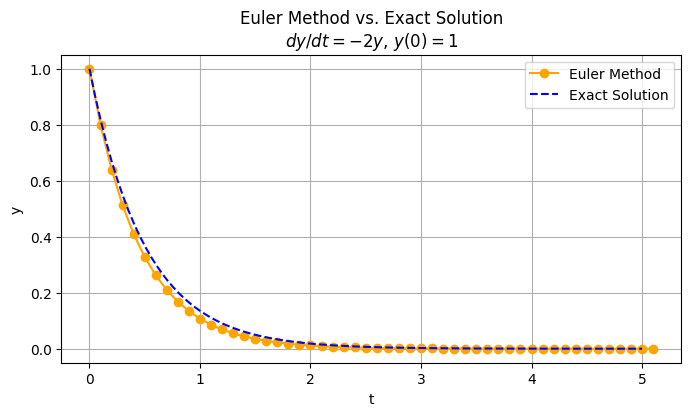

In [3]:
# Define the ODE: dy/dt = -2y
def f(t, y):
    return -2 * y

# Euler method implementation
def euler_method(f, t0, y0, h, t_end):
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0

    while t < t_end:
        y = y + h * f(t, y)
        t = t + h
        t_values.append(t)
        y_values.append(y)

    return np.array(t_values), np.array(y_values)

# Initial values and step size
t0 = 0
y0 = 1
h = 0.1
t_end = 5

# Solve using Euler method
t_vals, y_vals = euler_method(f, t0, y0, h, t_end)

# Exact solution for comparison
t_exact = np.linspace(t0, t_end, 100)
y_exact = np.exp(-2 * t_exact)

# Plot both solutions
plt.figure(figsize=(8, 4))
plt.plot(t_vals, y_vals, 'o-', label='Euler Method', color='orange')
plt.plot(t_exact, y_exact, label='Exact Solution', linestyle='--', color='blue')
plt.title("Euler Method vs. Exact Solution\n$dy/dt = -2y$, $y(0) = 1$")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
